<a href="https://colab.research.google.com/github/Chinmay-47/Deep_Learning_Udemy/blob/master/tf_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

In [20]:
samples = 500
D = 2
M = 3
K = 3

In [21]:
X1 = np.random.randn(samples, D) + np.array([0,-2])
X2 = np.random.randn(samples, D) + np.array([2,2])
X3 = np.random.randn(samples, D) + np.array([-2,2])
X = np.vstack([X1,X2,X3]).astype(np.float32)

In [22]:
Y = np.array([0]* samples + [1]*samples + [2]*samples)

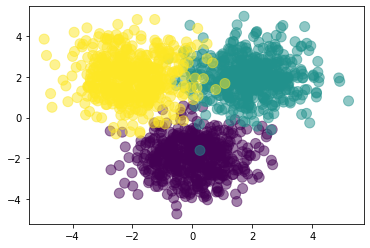

In [23]:
plt.scatter(X[:,0],X[:,1], c=Y,s=100,alpha=0.5)
plt.show()

In [24]:
N = len(Y)

T = np.zeros((N,K))
for i in range(N):
    T[i,Y[i]] = 1
print(T)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [25]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.01))

def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X,W1)+b1)
    return tf.matmul(Z,W2)+b2

In [26]:
tfx = tf.placeholder(tf.float32, [None,D])
tfy = tf.placeholder(tf.float32, [None,K])

In [41]:
W1 = init_weights([D,M])
b1 = init_weights([M])
W2 = init_weights([M,K])
b2 = init_weights([K])

logits = forward(tfx,W1,b1,W2,b2)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = tfy,logits = logits))

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) 
predict_op = tf.argmax(logits,1)

In [42]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    sess.run(train_op, feed_dict={tfx: X, tfy: T})
    pred = sess.run(predict_op, feed_dict={tfx: X,tfy: T})
    if i%10 == 0:
        print(np.mean(Y==pred))



0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.334
0.3406666666666667
0.36866666666666664
0.3993333333333333
0.452
0.49466666666666664
0.5433333333333333
0.5793333333333334
0.6173333333333333
0.6706666666666666
0.726
0.784
0.8273333333333334
0.8593333333333333
0.8926666666666667
0.9206666666666666
0.9406666666666667
0.948
0.9526666666666667
0.9546666666666667
0.9526666666666667
0.9513333333333334
0.95
0.948
0.946
0.944
0.9426666666666667
0.942
0.942
0.942
0.944
0.944
0.9426666666666667
0.944
0.944
0.9453333333333334
0.946
0.9473333333333334
0.948
0.9493333333333334
0.9526666666666667
0.9526666666666667
0.954666666666666